In [ ]:

import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/haarcascades/haarcascade_upperbody.xml
/kaggle/input/haarcascades/haarcascade_eye.xml
/kaggle/input/haarcascades/haarcascade_licence_plate_rus_16stages.xml
/kaggle/input/haarcascades/haarcascade_frontalface_default.xml
/kaggle/input/haarcascades/haarcascade_frontalcatface_extended.xml
/kaggle/input/haarcascades/haarcascade_eye_tree_eyeglasses.xml
/kaggle/input/haarcascades/haarcascade_fullbody.xml
/kaggle/input/haarcascades/haarcascade_lowerbody.xml
/kaggle/input/haarcascades/haarcascade_righteye_2splits.xml
/kaggle/input/haarcascades/haarcascade_frontalface_alt_tree.xml
/kaggle/input/haarcascades/haarcascade_frontalcatface.xml
/kaggle/input/haarcascades/haarcascade_frontalface_alt.xml
/kaggle/input/haarcascades/haarcascade_russian_plate_number.xml
/kaggle/input/haarcascades/haarcascade_smile.xml
/kaggle/input/haarcascades/haarcascade_profileface.xml
/kaggle/input/haarcascades/haarcascade_frontalface_alt2.xml
/kaggle/input/haarcascades/haarcascade_lefteye_2splits.xml
/kag

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2

2024-03-20 17:47:25.641887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 17:47:25.641980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 17:47:25.772242: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
image_size=(128,128)

data_dir='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset'
train_gen=tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rescale=1./255
)
val_gen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_ds=train_gen.flow_from_directory('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train',target_size=image_size,seed=42)
val_ds=val_gen.flow_from_directory('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation',target_size=image_size,seed=42)
test_ds=test_gen.flow_from_directory('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test',target_size=image_size,seed=42)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


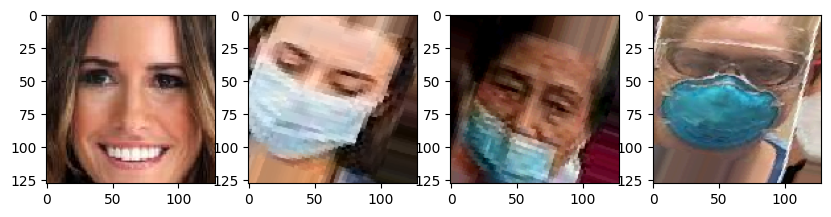

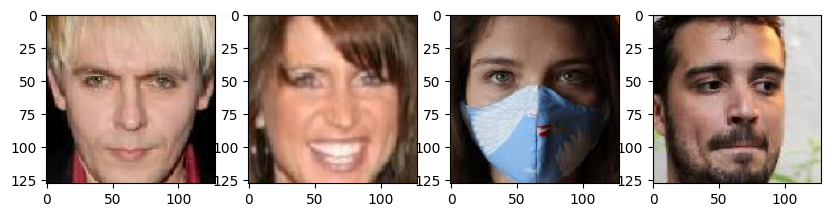

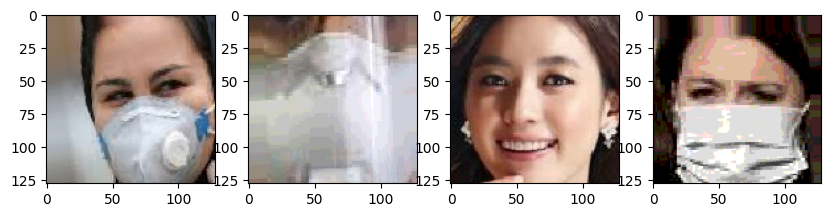

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images from a data generator
def plot_images(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])

# Plot some images from the training dataset
plot_images(train_ds)

# Plot some images from the validation dataset
plot_images(val_ds)

# Plot some images from the test dataset
plot_images(test_ds)

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the VGG19 base model
base_model = tf.keras.applications.VGG19(include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Build the model
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# Create dummy input data
dummy_input = tf.random.normal((1, 128, 128, 3))

# Display model summary
model.build(input_shape=(None, 128, 128, 3))  # Explicitly build the model with input shape
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 4, 4, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,040,770 (76.45 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
=early_stopping = keras.callbacks.EarlyStopping(monitor='val_binary_accuracy',mode='max',
                                patience=4,restore_best_weights=True)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_binary_accuracy',factor=0.5,
                                patience=2,verbose=1)

# training
history = model.fit(train_ds,batch_size=32,epochs=30,
        validation_data=val_ds,callbacks=[early_stopping,lr_scheduler])

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-20 17:47:53.271739: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.34782, expected 3.51669
2024-03-20 17:47:53.271799: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.71977, expected 5.88864
2024-03-20 17:47:53.271808: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.95696, expected 6.12583
2024-03-20 17:47:53.271816: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.48105, expected 5.64992
2024-03-20 17:47:53.271823: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

  1/313 ━━━━━━━━━━━━━━━━━━━━ 55:38 11s/step - binary_accuracy: 0.5000 - loss: 0.9732

I0000 00:00:1710956879.881733      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 67/313 ━━━━━━━━━━━━━━━━━━━━ 45s 186ms/step - binary_accuracy: 0.8070 - loss: 0.4300

2024-03-20 17:48:12.805836: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12288: 3.16341, expected 2.72723
2024-03-20 17:48:12.805919: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12416: 3.00427, expected 2.56808
2024-03-20 17:48:12.805946: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16384: 4.67983, expected 3.93377
2024-03-20 17:48:12.805955: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16385: 6.45374, expected 5.70769
2024-03-20 17:48:12.805963: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16386: 6.1411, expected 5.39504
2024-03-20 17:48:12.805972: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16387: 5.93718, expected 5.19113
2024-03-20 17:48:12.805980: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16388: 4.45506, expected 3.70901
2024-03-20 17:48:12.805988: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 213ms/step - binary_accuracy: 0.9114 - loss: 0.2267 - val_binary_accuracy: 0.9831 - val_loss: 0.0585 - learning_rate: 0.0010
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - binary_accuracy: 0.9828 - loss: 0.0578 - val_binary_accuracy: 0.9906 - val_loss: 0.0380 - learning_rate: 0.0010
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - binary_accuracy: 0.9892 - loss: 0.0391 - val_binary_accuracy: 0.9919 - val_loss: 0.0279 - learning_rate: 0.0010
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - binary_accuracy: 0.9921 - loss: 0.0288 - val_binary_accuracy: 0.9937 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - binary_accuracy: 0.9928 - loss: 0.0256 - val_binary_accuracy: 0.9950 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - binary_accuracy: 0.9948 - loss: 0.0200 - val_binary_accuracy: 0.9956 - val_loss: 0.0190 - learning_rate: 0.0010
Ep

In [ ]:
model.evaluate(test_ds)

31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - binary_accuracy: 0.9966 - loss: 0.0128


[0.02089967206120491, 0.9924395084381104]

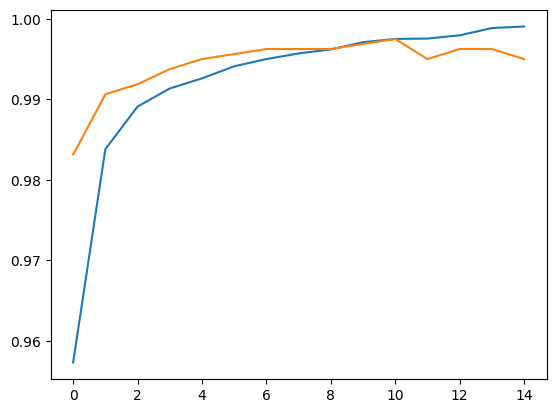

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.show()

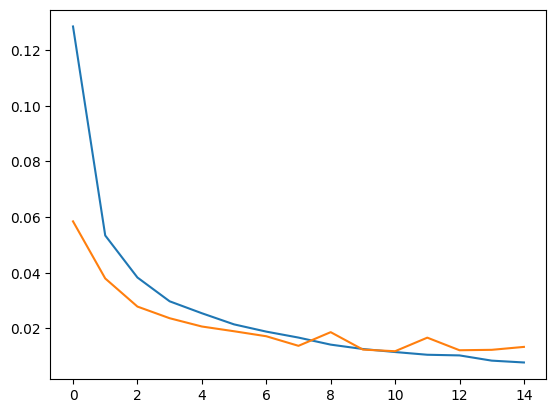

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### Fine Tuning

In [ ]:
# unfreeze all the layers
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_binary_accuracy',mode='max',
                                patience=4,restore_best_weights=True)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_binary_accuracy',factor=0.5,
                                patience=2,verbose=1)

# training
history = model.fit(train_ds,batch_size=32,epochs=30,
        validation_data=val_ds,callbacks=[early_stopping,lr_scheduler])

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 120ms/step - binary_accuracy: 0.9919 - loss: 0.0248 - val_binary_accuracy: 0.9969 - val_loss: 0.0109 - learning_rate: 1.0000e-05
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - binary_accuracy: 0.9963 - loss: 0.0123 - val_binary_accuracy: 1.0000 - val_loss: 0.0023 - learning_rate: 1.0000e-05
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - binary_accuracy: 0.9992 - loss: 0.0026 - val_binary_accuracy: 0.9987 - val_loss: 0.0015 - learning_rate: 1.0000e-05
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - binary_accuracy: 0.9992 - loss: 0.0016
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - binary_accuracy: 0.9991 - loss: 0.0017 - val_binary_accuracy: 1.0000 - val_loss: 0.0013 - learning_rate: 1.0000e-05
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - binary_accuracy: 0.9995 - loss: 0.0012 - val_binary_accuracy: 1.0000 - val_loss: 2.8827e-04 - le

In [ ]:
# test model
model.evaluate(test_ds)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - binary_accuracy: 0.9998 - loss: 0.0023


[0.004673635121434927, 0.9989919066429138]

### Using haar cascade to detect faces

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. We'll be using a Haar Cascade Model trained to detect faces in order to obtain the bounding box coordinates of faces in an image

In [ ]:
# loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('/kaggle/input/haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)} # rectangle color

We now take crops of the faces detected in the image and use the model trained in the above section to determine whether the individual faces have a mask or not. Those who do not wear masks are marked in red and those who do are marked in green

In [ ]:
def plot_image(image, subplot):
    plt.subplot(*subplot)
    plt.imshow(image)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

def predict_image(image_dir):
    # Read the image
    img = cv2.imread(image_dir)
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

    # Detect faces in the image
    faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

    # Convert the image to RGB color space
    out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Plot the original image
    plt.figure(figsize=(20, 20))
    plot_image(out_img, (1, 2, 1))

    # Iterate through detected faces
    for i in range(len(faces)):
        # Extract face bounding box coordinates
        (x, y, w, h) = faces[i]
        # Crop the face region from the original image
        crop = out_img[y:y+h, x:x+w]
        # Resize the cropped face to 128x128 pixels
        crop = cv2.resize(crop, (128, 128))
        # Reshape and normalize the cropped face
        crop = np.reshape(crop, [1, 128, 128, 3]) / 255.0
        # Predict mask on the cropped face
        mask_result = model.predict(crop).argmax()
        # Draw rectangle around the face region
        cv2.rectangle(out_img, (x, y), (x+w, y+h), dist_label[mask_result], 1)


    plot_image(out_img, (1, 2, 2))


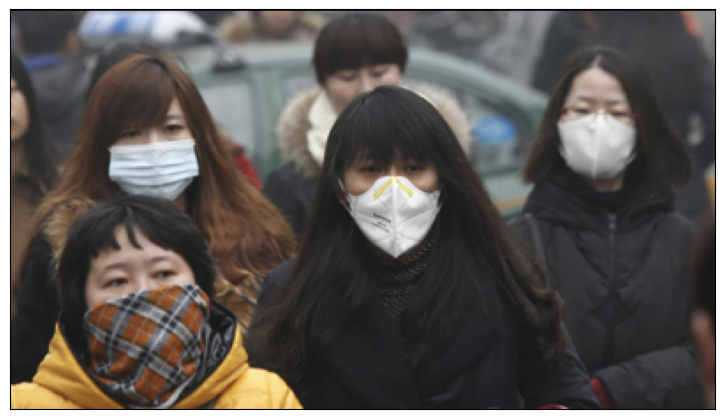

2024-03-20 17:59:54.214304: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32768: 3.66788, expected 2.82077
2024-03-20 17:59:54.214381: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32769: 5.27059, expected 4.42348
2024-03-20 17:59:54.214390: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32770: 5.00058, expected 4.15347
2024-03-20 17:59:54.214398: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32771: 4.72297, expected 3.87586
2024-03-20 17:59:54.214407: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32772: 4.5861, expected 3.73899
2024-03-20 17:59:54.214415: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32773: 4.17555, expected 3.32844
2024-03-20 17:59:54.214422: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32774: 3.43326, expected 2.58615
2024-03-20 17:59:54.214430: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


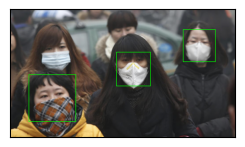

In [ ]:
predict_image('/kaggle/input/face-mask-detection/images/maksssksksss21.png')

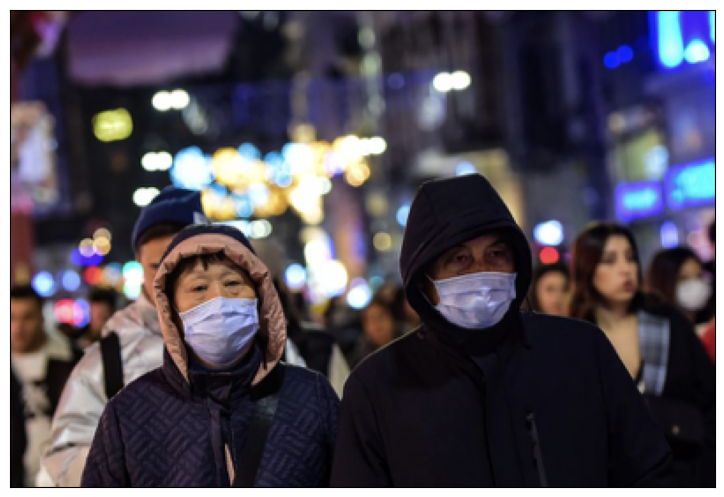

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


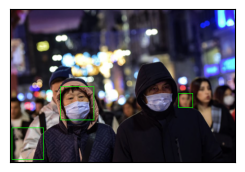

In [ ]:
predict_image('/kaggle/input/face-mask-detection/images/maksssksksss124.png')

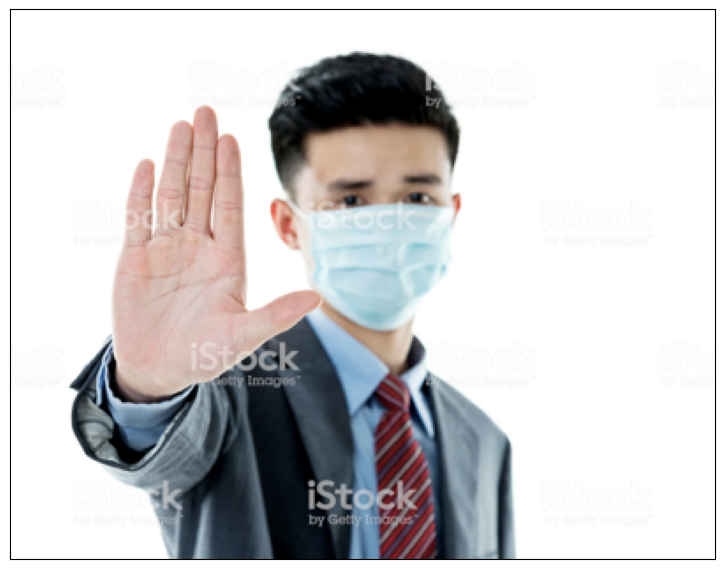

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


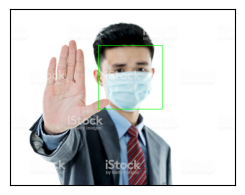

In [ ]:
predict_image('/kaggle/input/face-mask-detection/images/maksssksksss27.png')